# ZASR

一个简单粗暴的语音识别解决方案


## 加载数据集

获取音频和文本的文件名


In [81]:
from zasr import params
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

DataSetPath = "/mnt/sdb/aidatatang_200zh/corpus"
list_audio = tf.data.Dataset.list_files(DataSetPath+"/*/*/*.wav")

for f in list_audio.take(4):
    print(f.numpy())
    print(tf.strings.regex_replace(f,"wav","txt").numpy())

b'/tmp/aidatatang_200zh/corpus/test/G0328/T0055G0328S0267.wav'
b'/tmp/aidatatang_200zh/corpus/test/G0328/T0055G0328S0267.txt'
b'/tmp/aidatatang_200zh/corpus/train/G2331/T0055G2331S0199.wav'
b'/tmp/aidatatang_200zh/corpus/train/G2331/T0055G2331S0199.txt'
b'/tmp/aidatatang_200zh/corpus/train/G0030/T0055G0030S0181.wav'
b'/tmp/aidatatang_200zh/corpus/train/G0030/T0055G0030S0181.txt'
b'/tmp/aidatatang_200zh/corpus/test/G3114/T0055G3114S0045.wav'
b'/tmp/aidatatang_200zh/corpus/test/G3114/T0055G3114S0045.txt'


## 音频文件预处理

使用的数据集都为 16kHz 16bit 整形的音频，处理为logfbank的形式

## 文本文件预处理

将整个句子分成单个字符，统一编码格式为 Unicode，转换为 32 位的浮点列表，1.0 为 1，-1.0 为 0


tf.Tensor(b'/mnt/sdb/aidatatang_200zh/corpus/train/G3040/T0055G3040S0307.wav', shape=(), dtype=string)
tf.Tensor([0.00109863 0.00180054 0.00128174 ... 0.00515747 0.00686646 0.00674438], shape=(43832,), dtype=float32)
tf.Tensor(
[[3.9337311e-02 7.1797684e-02 6.8033628e-02 ... 2.0651943e-03
  3.5430898e-03 1.3557114e-03]
 [1.1905140e-02 4.7732431e-02 8.7527812e-02 ... 1.4170811e-03
  1.0488828e-03 4.5371708e-06]
 [2.2208931e-02 2.6442457e-02 7.0648357e-02 ... 1.0904488e-03
  1.9872517e-03 3.3378345e-04]
 ...
 [5.6481282e-03 1.9688269e-01 3.7437809e-01 ... 2.2136350e-03
  1.8254337e-03 1.1476893e-03]
 [2.1893005e-01 2.5053304e-01 5.2513742e-01 ... 1.5215564e-03
  1.8259567e-03 2.9439554e-03]
 [7.9477765e-02 7.5267091e-02 6.6507891e-02 ... 7.8671140e-04
  1.1207636e-03 1.3804808e-03]], shape=(343, 128), dtype=float32)


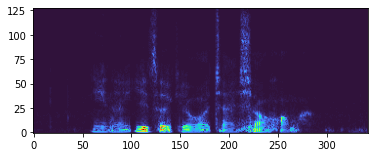

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(128, 32), dtype=float32)


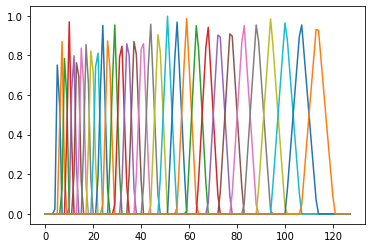

tf.Tensor(
[[0.13752772 0.14167461 0.04825319 ... 0.01811541 0.01544409 0.02527908]
 [0.03933145 0.04216583 0.04298285 ... 0.02624294 0.01947061 0.01217253]
 [0.03155941 0.02148409 0.02490088 ... 0.02331723 0.02067614 0.01138066]
 ...
 [0.08662879 0.05122808 0.02730119 ... 0.03558055 0.02411798 0.02003095]
 [0.05231445 0.02096729 0.02056337 ... 0.04276284 0.02103723 0.02463548]
 [0.0174439  0.00752481 0.00708332 ... 0.01525774 0.00718431 0.00873557]], shape=(343, 32), dtype=float32)


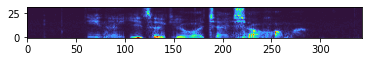

tf.Tensor(
[[-0.9475559  -0.83143055 -1.6575472  ... -0.911778   -0.9830768
  -0.36170983]
 [-2.199339   -2.0433369  -1.7732053  ... -0.54116154 -0.7514105
  -1.0924625 ]
 [-2.4194856  -2.7176113  -2.3190866  ... -0.6593611  -0.69133925
  -1.1597233 ]
 ...
 [-1.4097449  -1.8486632  -2.227063   ... -0.23676944 -0.537369
  -0.5943985 ]
 [-1.914097   -2.741959   -2.51047    ... -0.05290365 -0.6740267
  -0.38749838]
 [-3.012341   -3.766632   -3.5761461  ... -1.0834441  -1.7483294
  -1.4242086 ]], shape=(343, 32), dtype=float32)


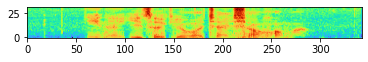

tf.Tensor(
[[-0.9475559  -0.83143055 -1.6575472  ... -0.911778   -0.9830768
  -0.36170983]
 [-2.199339   -2.0433369  -1.7732053  ... -0.54116154 -0.7514105
  -1.0924625 ]
 [-2.4194856  -2.7176113  -2.3190866  ... -0.6593611  -0.69133925
  -1.1597233 ]
 ...
 [-1.914097   -2.741959   -2.51047    ... -0.05290365 -0.6740267
  -0.38749838]
 [-3.012341   -3.766632   -3.5761461  ... -1.0834441  -1.7483294
  -1.4242086 ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]], shape=(344, 32), dtype=float32)


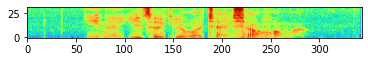

tf.Tensor([36 64 32], shape=(3,), dtype=int32)


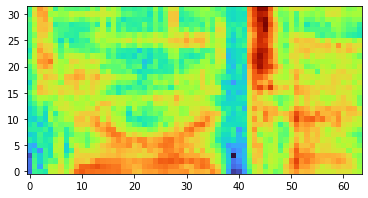

你能一直给我讲笑话吗
tf.Tensor(b'\xe4\xbd\xa0\xe8\x83\xbd\xe4\xb8\x80\xe7\x9b\xb4\xe7\xbb\x99\xe6\x88\x91\xe8\xae\xb2\xe7\xac\x91\xe8\xaf\x9d\xe5\x90\x97', shape=(), dtype=string)
tf.Tensor([20320 33021 19968 30452 32473 25105 35762 31505 35805 21527], shape=(10,), dtype=int32)


In [8]:
import matplotlib.pyplot as plt

for f in list_audio.take(1):
    print(f)
    audio_raw = tf.io.read_file(f)
    audio, _ = tf.audio.decode_wav(audio_raw)
    if tf.rank(audio) > 1:
        audio = audio[:, 0]
    print(audio)
    audio_stft = tf.signal.stft(
        audio, frame_length=256, frame_step=128, window_fn=tf.signal.hamming_window, pad_end=True)
    audio_stft = tf.abs(audio_stft)[:, 1:]
    print(audio_stft)
    plt.imshow(audio_stft.numpy().T, cmap='turbo', origin='lower')
    plt.show()
    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
        num_mel_bins=32, num_spectrogram_bins=128, sample_rate=8000)
    print(linear_to_mel_weight_matrix)
    plt.plot(linear_to_mel_weight_matrix)
    plt.show()
    mel_specs = tf.tensordot(audio_stft, linear_to_mel_weight_matrix, 1)
    print(mel_specs)
    plt.imshow(mel_specs.numpy().T, cmap='turbo', origin='lower')
    plt.show()
    log_mel_specs = tf.math.log(mel_specs + 1e-6)
    log_mel_specs -= (tf.reduce_mean(log_mel_specs, axis=0) + 1e-8)
    print(log_mel_specs)
    plt.imshow(log_mel_specs.numpy().T, cmap='turbo', origin='lower')
    plt.show()
    input_shape = tf.shape(log_mel_specs)
    zeros = tf.zeros([-(-input_shape[0]//8)*8 - input_shape[0], 32], dtype=tf.dtypes.float32)
    mel_input = tf.concat([log_mel_specs, zeros], 0)
    print(mel_input)
    plt.imshow(mel_input.numpy().T, cmap='turbo', origin='lower')
    plt.show()
    mel_input = tf.map_fn(lambda i: tf.slice(mel_input,[i*8,0],[64,32]),tf.range(tf.shape(mel_input)[0]//8 -7),fn_output_signature=tf.TensorSpec(shape=[64,32]))
    print(tf.shape(mel_input))
    plt.imshow(mel_input[tf.shape(mel_input)[0]//2].numpy().T, cmap='turbo', origin='lower')
    plt.show()
    f = tf.strings.regex_replace(f, "wav", "txt")
    trans_row = tf.io.read_file(f)
    trans_row = tf.strings.regex_replace(trans_row, "\n", "")
    print(trans_row.numpy().decode('utf8'))
    # trans_row = tf.strings.unicode_split(trans_row,'UTF-8')
    print(trans_row)
    trans = tf.strings.unicode_decode(trans_row, 'UTF-8')
    print(trans)


## 制作数据集

将上面的操作整理成一个函数,然后传入数据集生成函数


In [10]:
def load_dataset_aidatatang(f):
    audio_raw = tf.io.read_file(f)
    audio, _ = tf.audio.decode_wav(audio_raw)
    if tf.rank(audio) > 1:
        audio = audio[:, 0]
    audio_stft = tf.signal.stft(audio,frame_length=256,frame_step=128,window_fn=tf.signal.hamming_window,pad_end=True)
    audio_stft = tf.abs(audio_stft)[:,1:]
    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(num_mel_bins=32, num_spectrogram_bins=128, sample_rate=8000)
    mel_specs = tf.tensordot(audio_stft,linear_to_mel_weight_matrix, 1)
    log_mel_specs = tf.math.log(mel_specs + 1e-6)
    log_mel_specs -= (tf.reduce_mean(log_mel_specs, axis=0) + 1e-8)
    input_shape = tf.shape(log_mel_specs)
    zeros = tf.zeros([-(-input_shape[0]//8)*8 - input_shape[0],32],dtype=tf.dtypes.float32)
    mel_input = tf.concat([log_mel_specs,zeros],0)
    mel_input = tf.map_fn(lambda i: tf.slice(mel_input,[i*8,0],[64,32]),tf.range(tf.shape(mel_input)[0]//8 -7),fn_output_signature=tf.TensorSpec(shape=[64,32]))
    f = tf.strings.regex_replace(f,"wav","txt")
    trans_row = tf.io.read_file(f)
    trans_row = tf.strings.regex_replace(trans_row,"\n","")
    trans = tf.strings.unicode_decode(trans_row, 'UTF-8')
    return mel_input, trans

aidata_dataset = list_audio.map(load_dataset_aidatatang)
for mel, trans in aidata_dataset.take(1):
    print(mel)
    print(trans)


tf.Tensor(
[[[-1.2787600e+00 -1.1532750e+00 -1.9312139e+00 ... -1.0039608e+00
   -1.0115678e+00 -9.5874310e-01]
  [-3.0057814e+00 -1.7126637e+00 -1.6985974e+00 ... -1.2017171e+00
   -1.3047857e+00 -1.0658708e+00]
  [-1.4921615e+00 -1.1926146e+00 -1.4341323e+00 ... -1.0009520e+00
   -1.1722038e+00 -1.0898569e+00]
  ...
  [ 1.4284267e+00  1.0957139e+00  8.5264993e-01 ...  9.1510296e-01
    7.5720716e-01  1.3472273e+00]
  [ 2.2366216e+00  2.0887911e+00  1.7317357e+00 ...  3.4764719e-01
    4.4840813e-02 -2.6326180e-03]
  [ 2.1045802e+00  1.8146152e+00  1.0743300e+00 ... -7.5382948e-02
    3.5194147e-01  7.1934080e-01]]

 [[-2.0383987e+00 -1.4517090e+00 -2.4185040e+00 ... -1.3444765e+00
   -1.0686514e+00 -8.9416575e-01]
  [-1.8244178e+00 -1.9006691e+00 -1.6559825e+00 ... -1.6456161e+00
   -9.9413991e-01 -1.1268160e+00]
  [-1.3174303e+00 -1.9234643e+00 -2.2870531e+00 ... -1.3300068e+00
   -1.1795325e+00 -5.2262163e-01]
  ...
  [ 2.6557951e+00  1.1766195e+00  6.7851555e-01 ...  2.1706212e-01

## 定义模型


缝合CNN+ResNet+RNN的模型

In [123]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers

# MEL_STEP = params.HP_MEL_STEP.domain.values[0]
# CNN_FILTER = params.HP_CNN_FILTER.domain.values[0]
MEL_STEP = 16
CNN_FILTER = 512

class ConvRNNCell(keras.Model):
    def __init__(self, **kwargs):
        self.state_size = [tf.TensorShape([16,256])]
        super(ConvRNNCell, self).__init__(**kwargs)
    def build(self,input_shape):
        self.relu_ac_layer = tf.keras.layers.ReLU(max_value=127, negative_slope=1/256)
        self.pre_am_conv_layer = layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform')
        self.pre_lm_conv_layer = layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform')
        self.am_conv_layers = list()
        for i in tf.range(4):
            self.am_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.am_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.am_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.am_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=2, padding="same", kernel_initializer='he_uniform'))
        self.lm_conv_layers = list()
        for i in tf.range(2):
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_uniform'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=2, padding="same", kernel_initializer='he_uniform'))
        self.jt_flatten_layer = layers.Flatten()
        self.jt_emb_layer = layers.Dense(256, kernel_initializer='he_uniform')
        self.chr_fc_layer = layers.Dense(65536, kernel_initializer='he_uniform')
        self.built = True
    def call(self, input_at_t, state_at_t):
        am = list()
        am.append(self.pre_am_conv_layer(input_at_t))
        am.append(self.relu_ac_layer(am[-1]))
        for i in range(4):
            am.append(self.am_conv_layers[4*i](am[-1]))
            am.append(self.relu_ac_layer(am[-1]))
            am.append(self.am_conv_layers[4*i+1](am[-1]))
            am.append(self.relu_ac_layer(am[-1]))
            am.append(self.am_conv_layers[4*i+2](am[-1]))
            am.append(self.relu_ac_layer(am[-1]))
            am.append(self.am_conv_layers[4*i+3](am[-1]))
            am.append(self.relu_ac_layer(am[-1]))
        lm = list()
        lm.append(self.pre_lm_conv_layer(state_at_t[0]))
        lm.append(self.relu_ac_layer(lm[-1]))
        for i in range(2):
            lm.append(self.lm_conv_layers[8*i](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+1](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+2](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+3](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+4](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+5](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+6](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+7](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
        jt = tf.concat([am[-1],lm[-1]],-1)
        jt_f = self.jt_flatten_layer(jt)
        jt_emb = self.relu_ac_layer(self.jt_emb_layer(jt_f))
        chr_emb = self.relu_ac_layer(self.chr_fc_layer(jt_emb))
        output_at_t = chr_emb
        state_at_t_plus_1 = tf.concat([state_at_t[0][:,1:,:],tf.expand_dims(jt_emb,1)],axis=1)
        return output_at_t, state_at_t_plus_1

x = keras.Input(shape=(None, 64, 128), name="mel_input")
cell = ConvRNNCell()
layer = layers.RNN(cell)
y=layer(x)
model = Model(inputs=x, outputs=y, name="ResConv2dRNN")
model.summary()

Model: "ResConv2dRNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mel_input (InputLayer)      [(None, None, 64, 128)]   0         
                                                                 
 rnn_46 (RNN)                (None, 65536)             38675200  
                                                                 
Total params: 38,675,200
Trainable params: 38,675,200
Non-trainable params: 0
_________________________________________________________________


## 训练模型


训练第三版

In [133]:
import time,datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers
# import os
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
DataSetPath = "/mnt/sdb/aidatatang_200zh/corpus/train"
# DataSetPath = "/tmp/aidatatang_200zh/corpus"
# list_audio = tf.data.Dataset.list_files(DataSetPath+"/*/*/*.wav")
list_audio = tf.data.Dataset.list_files(DataSetPath+"/*/*.wav")
MEL_STEP = 16
CNN_FILTER = 512

tf.config.experimental.set_synchronous_execution(enable=True)

def load_dataset_aidatatang(f):
    audio_raw = tf.io.read_file(f)
    audio, _ = tf.audio.decode_wav(audio_raw)
    if tf.rank(audio) > 1:
        audio = audio[:, 0]
    audio_stft = tf.signal.stft(audio,frame_length=256,frame_step=128,window_fn=tf.signal.hamming_window,pad_end=True)
    audio_stft = tf.abs(audio_stft)[:,1:]
    # linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(num_mel_bins=32, num_spectrogram_bins=128, sample_rate=8000)
    # mel_specs = tf.tensordot(audio_stft,linear_to_mel_weight_matrix, 1)
    # log_mel_specs = tf.math.log(mel_specs + 1e-6)
    # log_mel_specs -= (tf.reduce_mean(log_mel_specs, axis=0) + 1e-8)
    input_shape = tf.shape(audio_stft)
    zeros = tf.zeros([-(-input_shape[0]//8)*8 - input_shape[0],128],dtype=tf.dtypes.float32)
    audio_input = tf.concat([audio_stft,zeros],0)
    audio_input = tf.map_fn(lambda i: tf.slice(audio_input,[i*8,0],[64,128]),tf.range(tf.shape(audio_input)[0]//8 -7),fn_output_signature=tf.TensorSpec(shape=[64,128]))
    f = tf.strings.regex_replace(f,"wav","txt")
    trans_row = tf.io.read_file(f)
    trans_row = tf.strings.regex_replace(trans_row,"\n","")
    trans = tf.strings.unicode_decode(trans_row, 'UTF-8')
    return audio_input, trans

aidata_dataset = list_audio.map(load_dataset_aidatatang)
epochs = 2
# batchsize = 1129
# batchsize = 141
batchsize = 2
learning_rate = 0.00002 * batchsize
# train_dataset = aidata_dataset.skip(385)
train_dataset = aidata_dataset.skip(1)
train_dataset = train_dataset.padded_batch(batchsize)
# strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
# strategy = tf.distribute.MirroredStrategy()
# strategy = tf.distribute.MultiWorkerMirroredStrategy()
# tf.debugging.set_log_device_placement(True)

start_time = time.time()

# with strategy.scope():

class ConvRNNCell(keras.Model):
    def __init__(self, **kwargs):
        self.state_size = [tf.TensorShape([16,256])]
        super(ConvRNNCell, self).__init__(**kwargs)
    def build(self,input_shape):
        self.relu_ac_layer = tf.keras.layers.ReLU(max_value=127, negative_slope=1/256)
        self.pre_am_conv_layer = layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal')
        self.pre_lm_conv_layer = layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal')
        self.am_conv_layers = list()
        for i in tf.range(4):
            self.am_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.am_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.am_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.am_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=2, padding="same", kernel_initializer='he_normal'))
        self.lm_conv_layers = list()
        for i in tf.range(2):
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=1, padding="same", kernel_initializer='he_normal'))
            self.lm_conv_layers.append(layers.Conv1D(CNN_FILTER, 5, strides=2, padding="same", kernel_initializer='he_normal'))
        self.jt_flatten_layer = layers.Flatten()
        self.jt_emb_layer = layers.Dense(256, kernel_initializer='he_normal')
        self.chr_fc_layer = layers.Dense(65536, kernel_initializer='he_normal')
        self.built = True
    def call(self, input_at_t, state_at_t):
        am = list()
        am.append(self.pre_am_conv_layer(input_at_t))
        am.append(self.relu_ac_layer(am[-1]))
        for i in range(4):
            am.append(self.am_conv_layers[4*i](am[-1]))
            am.append(self.relu_ac_layer(am[-1]))
            am.append(self.am_conv_layers[4*i+1](am[-1]))
            am.append(self.relu_ac_layer(am[-1]))
            am.append(self.am_conv_layers[4*i+2](am[-1]))
            am.append(self.relu_ac_layer(am[-1]))
            am.append(self.am_conv_layers[4*i+3](am[-1]))
            am.append(self.relu_ac_layer(am[-1]))
        lm = list()
        lm.append(self.pre_lm_conv_layer(state_at_t[0]))
        lm.append(self.relu_ac_layer(lm[-1]))
        for i in range(2):
            lm.append(self.lm_conv_layers[8*i](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+1](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+2](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+3](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+4](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+5](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+6](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
            lm.append(self.lm_conv_layers[8*i+7](lm[-1]))
            lm.append(self.relu_ac_layer(lm[-1]))
        jt = tf.concat([am[-1],lm[-1]],-1)
        jt_f = self.jt_flatten_layer(jt)
        jt_emb = self.relu_ac_layer(self.jt_emb_layer(jt_f))
        chr_emb = self.relu_ac_layer(self.chr_fc_layer(jt_emb))
        output_at_t = chr_emb
        state_at_t_plus_1 = tf.concat([state_at_t[0][:,1:,:],tf.expand_dims(jt_emb,1)],axis=1)
        return output_at_t, state_at_t_plus_1
x = keras.Input(shape=(None, 64, 128), name="mel_input")
cell = ConvRNNCell()
layer = layers.RNN(cell, return_sequences=True, time_major=True)
y=layer(x)
model = Model(inputs=x, outputs=y, name="ConvRNN")
# model.load_weights('./dist/ConvRNN_512_1024_w')
model.load_weights('./dist/ConvRNN_w')
opt = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
model.compile(optimizer=opt)

@tf.function(autograph=False,experimental_relax_shapes=True)
def train_step(x_batch,y_batch,batchsize,model):
    tf.config.optimizer.set_experimental_options({'layout_optimizer': False})
    with tf.GradientTape(persistent=False) as tape:
        with tf.device('/gpu:0'):
            y_pred = model(x_batch)
            x_batch_shape = tf.shape(x_batch)
            logit_length = tf.repeat(x_batch_shape[1],batchsize)
            label_length = tf.reduce_sum(tf.cast(tf.math.greater(y_batch,0),tf.int32),axis=-1)
        with tf.device('/gpu:1'):
            loss = tf.nn.ctc_loss(labels=y_batch, logits=y_pred, label_length=label_length, logit_length=logit_length, logits_time_major=False, unique=None,blank_index=0)
        with tf.device('/gpu:0'):
            loss = tf.sigmoid(loss)*loss
            loss = tf.nn.compute_average_loss(loss, global_batch_size=batchsize)
            grads = tape.gradient(loss, model.trainable_weights)
            grads_mean = tf.reduce_mean(tf.abs(grads[0]))
            opt.apply_gradients(zip(grads, model.trainable_weights))
    return loss, grads_mean

for epoch in range(epochs):
    loss=0
    grads_mean = 0
    # Iterate over the batches of the dataset.
    for step, (x_batch, y_batch) in enumerate(train_dataset):
        loss_s, grads_mean_s= train_step(x_batch,y_batch,batchsize,model)
        # log
        timeall = int(time.time() - start_time)
        loss+=loss_s/100
        grads_mean+=grads_mean_s/100
        # print("Epoch:%2d, Batch:%6d, loss:%3.5f, grads:%f," %(epoch+1, step+1, loss_s, grads_mean_s),"time:",datetime.timedelta(seconds=timeall))
        if ((step+1) % 100) == 0:
            print("Epoch:%2d, Batch:%6d, loss:%3.5f, grads:%3.5f," %(epoch+1, step+1, loss, grads_mean),"time:",datetime.timedelta(seconds=timeall))
            loss=0
            grads_mean = 0
    opt.lr.assign(learning_rate/(10**(epoch+1)))

Epoch: 1, Batch:   100, loss:188.08549, grads:0.04652, time: 0:01:46
Epoch: 1, Batch:   200, loss:114.93600, grads:0.01111, time: 0:02:20
Epoch: 1, Batch:   300, loss:103.49051, grads:0.00915, time: 0:02:54
Epoch: 1, Batch:   400, loss:91.80338, grads:0.00670, time: 0:03:27
Epoch: 1, Batch:   500, loss:87.67065, grads:0.00629, time: 0:04:02
Epoch: 1, Batch:   600, loss:80.62704, grads:0.00509, time: 0:04:36
Epoch: 1, Batch:   700, loss:80.51125, grads:0.00467, time: 0:05:09
Epoch: 1, Batch:   800, loss:81.94012, grads:0.00554, time: 0:05:43
Epoch: 1, Batch:   900, loss:84.43048, grads:0.00652, time: 0:06:19
Epoch: 1, Batch:  1000, loss:84.36628, grads:0.00674, time: 0:06:54
Epoch: 1, Batch:  1100, loss:77.38728, grads:0.00608, time: 0:07:28
Epoch: 1, Batch:  1200, loss:77.58291, grads:0.00536, time: 0:08:03
Epoch: 1, Batch:  1300, loss:75.86658, grads:0.00506, time: 0:08:37
Epoch: 1, Batch:  1400, loss:83.18100, grads:0.00709, time: 0:09:13
Epoch: 1, Batch:  1500, loss:78.38461, grads:

## 保存模型

保存权重和整个模型


In [181]:
# model.save_weights('./dist/CNTRNN_3_16')
# model.save('./dist/ResConv2dRNN')
# model.save('ResConv2dRNN_h5.h5')
# new_model = tf.keras.models.load_model('./dist/ResConv2dRNN',compile=False)
# new_model.summary()
# model.save('./temp/233')
# model.save_weights('./dist/ConvRNN_w')
model.save_weights('./dist/ConvRNN_w.new')

## 评估模型

抽取数据，测试模型的输入输出


In [184]:
DataSetPath = "/mnt/sdb/aidatatang_200zh/corpus/test"
list_audio = tf.data.Dataset.list_files(DataSetPath+"/*/*.wav")
aidata_dataset = list_audio.map(load_dataset_aidatatang)
import numpy
model.load_weights('./dist/ConvRNN_w')
def cer(r: list, h: list):
    """
    Calculation of CER with Levenshtein distance.
    """
    # initialisation
    d = numpy.zeros((len(r) + 1) * (len(h) + 1), dtype=numpy.uint16)
    d = d.reshape((len(r) + 1, len(h) + 1))
    for i in range(len(r) + 1):
        for j in range(len(h) + 1):
            if i == 0:
                d[0][j] = j
            elif j == 0:
                d[i][0] = i
    # computation
    for i in range(1, len(r) + 1):
        for j in range(1, len(h) + 1):
            if r[i - 1] == h[j - 1]:
                d[i][j] = d[i - 1][j - 1]
            else:
                substitution = d[i - 1][j - 1] + 1
                insertion = d[i][j - 1] + 1
                deletion = d[i - 1][j] + 1
                d[i][j] = min(substitution, insertion, deletion)
    return d[len(r)][len(h)] / float(len(r))

error = 0
for am, lm in aidata_dataset.take(100):
    # print("lm:",lm)
    trans_str=""
    for ci in lm:
        trans_str+=chr(ci.numpy())
        
    print("trans_str:",trans_str)
    am = tf.expand_dims(am,-1)
    am = tf.expand_dims(am,0)
    y_pred = model(am)
    # print("y_pred:",y_pred)
    y_pred = tf.transpose(y_pred, [1,0,2])
    # print("y_pred:",y_pred)
    # y_pred_sm = tf.nn.softmax(y_pred,axis=-1)
    # y_pred_idx = tf.squeeze(tf.argmax(y_pred_sm,axis=-1))
    length = tf.reshape(tf.shape(y_pred)[0], [1])
    # print("length:",length)
    decoded, neg_sum_logits = tf.nn.ctc_greedy_decoder(inputs=y_pred, sequence_length=length, merge_repeated=True, blank_index=0)
    # print("decoded:",decoded[0].values)
    y_pred_idx = decoded[0].values.numpy()
    pred_str=""
    for ci in y_pred_idx:
        if ci != 0:
            pred_str+=chr(ci)
    print("pred_str:",pred_str)
    trans_str_list = list(trans_str)
    pred_str_list = list(pred_str)
    CER = cer(trans_str_list, pred_str_list)
    error += CER
    print(CER)
print("error mean:",error/100)


trans_str: 到时候就麻烦你了
pred_str: 都时候就么翻名
0.625
trans_str: 切糕事件是怎么回事
pred_str: 切高世件是怎么回事
0.2222222222222222
trans_str: 小乖GOODBYE
pred_str: 小乖个办
0.7777777777777778
trans_str: 你说会有宝宝吗
pred_str: 你首回友宝婆吗
0.5714285714285714
trans_str: 什么时候回来的呀
pred_str: 什么最回来的呀
0.25
trans_str: 你好我现在在什么地方
pred_str: 你好我现在的什么地方
0.1
trans_str: 你就是一个蠢货
pred_str: 你就是一个称活
0.2857142857142857
trans_str: 要想人不知除非己莫为
pred_str: 要想人么之出飞寂末位
0.7
trans_str: 复制全部作为网址然后搜索
pred_str: 附去全部作围浪这然后搜算
0.5
trans_str: 男生进商店帮女生买内衣会被歧视吗
pred_str: 难生局的商点帮首买的一会北体实吗
0.6875
trans_str: 你们是不是要放假了
pred_str: 你们是不是要房假了
0.1111111111111111
trans_str: 你也要好好学习呀
pred_str: 你也好好学息呀
0.25
trans_str: 市旅游局的上级主管单位是
pred_str: 是旅有记得上主个单卫始
0.6666666666666666
trans_str: 你准备得怎么样了
pred_str: 你准备的怎么样了
0.125
trans_str: 说的我有点想家了
pred_str: 说的永员想假了
0.5
trans_str: 不知道买什么样子的
pred_str: 不道买什么要我子的
0.3333333333333333
trans_str: 怎么样可以生儿子
pred_str: 怎么样可以说子
0.25
trans_str: 来一首中华人民共和国国歌
pred_str: 来一首中华人民工作我过歌
0.3333333333333333
trans_str: 到家了给我打个电话
pred_str: 高家了给我打个电话
0.111111111111